In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils

In [2]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)

In [6]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 12s 112ms/step - loss: 2.5897 - accuracy: 0.3470 - val_loss: 2.1268 - val_accuracy: 0.4693
Epoch 2/20
90/90 [==============================] - 11s 118ms/step - loss: 2.0144 - accuracy: 0.4829 - val_loss: 1.8976 - val_accuracy: 0.5022
Epoch 3/20
90/90 [==============================] - 11s 120ms/step - loss: 1.8626 - accuracy: 0.4973 - val_loss: 1.7751 - val_accuracy: 0.5405
Epoch 4/20
90/90 [==============================] - 11s 120ms/step - loss: 1.7162 - accuracy: 0.5512 - val_loss: 1.7502 - val_accuracy: 0.5374
Epoch 5/20
90/90 [==============================] - 11s 125ms/step - loss: 1.6170 - accuracy: 0.5817 - val_loss: 1.6152 - val_accuracy: 0.5864
Epoch 6/20
90/90 [==============================] - 11s 120ms/step - loss: 1.5267 - accuracy: 0.6067 - val_loss: 1.5187 - val_accuracy: 0.6287
Epoch 7/20
90/90 [==============================] - 11s 125ms/step - loss: 1.4095 - accuracy: 0.6358 - val_loss: 1.4669 - val_accuracy: 0.6300

In [11]:
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 19ms/step - loss: 1.2006 - accuracy: 0.7155
Test Accuracy: 0.7155


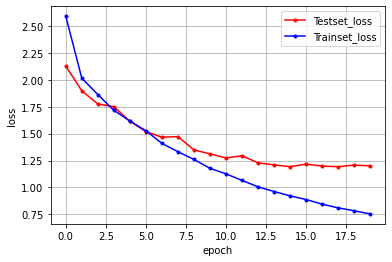

In [12]:
y_vloss = history. history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()